In [6]:
import glob
import json
import os

from iexfinance.stocks import Stock
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import pandas as pd

In [14]:
files = glob.glob("data/popularity_export/*.csv")

In [25]:
avg_holding = {}
for i in files:
    df = pd.read_csv(i)
    avg_holding[i.split('/')[-1].split(".csv")[0]] = df['users_holding'].mean()
print(len(avg_holding))

8590


(array([8.523e+03, 3.400e+01, 1.300e+01, 1.200e+01, 2.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.        ,  45874.27871657,  91748.55743314, 137622.83614971,
        183497.11486628, 229371.39358285, 275245.67229943, 321119.951016  ,
        366994.22973257, 412868.50844914, 458742.78716571]),
 <BarContainer object of 10 artists>)

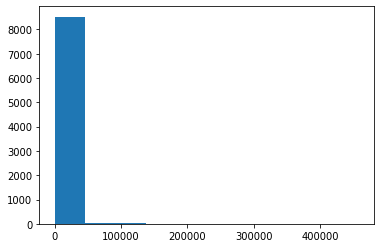

In [29]:
plt.hist(avg_holding.values())

In [34]:
df = pd.DataFrame.from_dict(avg_holding, orient='index')
df.to_csv('average_popularity.csv')

In [2]:
files = glob.glob("data/reddit_submissions/*.json")

In [21]:
reddit_dict = {'data': []}
reddit_dict_b = {}
ct = 0
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
    for x in data['data']:
        ct += 1
        x['source_file'] = file
        reddit_dict['data'].append(x)
        reddit_dict_b[str(ct)] = x

In [22]:
print(len(reddit_dict['data']))
print(len(reddit_dict_b))


342254
342254


In [23]:
df = pd.DataFrame.from_dict(reddit_dict_b, orient='index')

In [2]:
df = pd.read_csv("data/reddit_submissions/all_submissions.csv")

/Users/dclark171/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,10,11,20,23,35,63,71,72,77,84,85,86,87,89,90,91,92,93,94,95,97,100,101,103,104,105,106,108,110) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
with open("keys.json", "r") as f:
    keys = json.load(f)
key = keys['keys']['iex']['secret']
files = glob.glob("data/popularity_export/*.csv")


In [26]:
live = "iexcloud-v1"
sandbox = "iexcloud-sandbox"
os.environ["IEX_API_VERSION"] = live


In [8]:
dict_names = {}
tickers = [x.split('/')[-1].split('.')[0] for x in files]
no_result = []
for cmp in tickers:  
    try:
        stock = Stock(cmp, token=key)
        if not stock:
            no_result.append(cmp)
            continue
        data = stock.get_company()
    except Exception as e:
        no_result.append(cmp)
        print(e)
        continue
    if not data:
        no_result.append(cmp)
        continue
    dict_names[cmp] = data

An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Symbol _OUT not found.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the query.
An error occurred while making the 

In [9]:
import json
with open('iex_data.json', 'w') as fp:
    json.dump(dict_names, fp)

In [64]:
files = glob.glob("data/popularity_export/*.csv")
files_2 = glob.glob("data/performance/*.csv")
tickers = set([x.split('/')[-1].split('.')[0] for x in files])
tickers_2 = set([x.split('/')[-1].split('.')[0] for x in files_2])
tickers = tickers - tickers_2

In [65]:
len(tickers - tickers_2)

6048

In [4]:
with open('data/iex_data.json', 'r') as fp:
    data = json.load(fp)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [14]:
q = list(dict_names.keys())

In [16]:
for k, v in dict_names.items():
    if v['companyName']:
        q.append(v['companyName'])

In [48]:
q = list(set(q))
len(q)
q = list(map(lambda x: x.lower(), q))
print(q[:10])

['ishares north american tech-software etf', 'synopsys, inc.', 'cphc', 'roch', 'eff', 'alks', 'tdtt', 'pw', 'xlb', 'qep']


In [38]:
df = pd.read_csv("/Users/dclark171/projects/python/retailMarketAnalysis/data/reddit_submissions/all_submissions.csv").dropna(subset=['selftext'])

len(df)

177640

In [45]:
df = df[df['selftext'] != "[deleted]"]
df = df[df['selftext'] != "[removed]"]
df['text'] = df['selftext'].apply(lambda x: x.lower())
df['text2'] = df['text'].apply(lambda x: x.replace("\n", ""))
print(len(df))

106259


In [50]:
stock_freq = {}
ct = 0
for i in df['text2']:
    for x in q:
        if x in i:
            ct += 1
            if stock_freq.get(x):
                stock_freq[x] = stock_freq[x] + 1
            else:
                stock_freq[x] = 1
print(ct)

12814731


In [53]:
import pprint


print(len(stock_freq.keys()))


7655


In [55]:
pprint.pprint(stock_freq)

{'10x genomics, inc.': 1,
 '2u, inc.': 1,
 '3m co.': 2,
 '58.com inc.': 2,
 'a': 102718,
 'a10 networks, inc.': 1,
 'aa': 3661,
 'aaau': 3,
 'aacg': 1,
 'aal': 383,
 'aamc': 4,
 'aame': 1,
 'aan': 186,
 'aaoi': 11,
 'aaon': 10,
 'aap': 1609,
 'aapl': 1440,
 'aar corp.': 1,
 'aat': 25,
 'aau': 16,
 'aaww': 11,
 'aaxj': 2,
 'aaxn': 32,
 'ab': 34008,
 'abb': 678,
 'abbott laboratories': 14,
 'abbv': 103,
 'abc': 207,
 'abcb': 7,
 'abcd': 8,
 'abdc': 5,
 'abeo': 12,
 'abev': 8,
 'abg': 19,
 'abio': 9,
 'abm': 18,
 'abmd': 8,
 'abr': 252,
 'abt': 121,
 'abtx': 1,
 'abus': 242,
 'ac': 43161,
 'aca': 628,
 'acad': 142,
 'acam': 9,
 'acb': 420,
 'acbi': 2,
 'acc': 11050,
 'accd': 7,
 'accenture plc': 3,
 'acco': 7405,
 'acel': 28,
 'acer': 95,
 'aces': 973,
 'acgl': 2,
 'ach': 7691,
 'achc': 8,
 'achn': 7,
 'achv': 5,
 'aci': 2134,
 'acia': 70,
 'acio': 39,
 'aciu': 1,
 'aciw': 4,
 'acls': 2,
 'acm': 26,
 'acmr': 1,
 'acn': 61,
 'acor': 41,
 'acp': 13,
 'acre': 129,
 'acrs': 8,
 'acrx': 14,
 '

 'bkng': 37,
 'bkr': 70,
 'bkt': 3,
 'bku': 5,
 'bkyi': 2,
 'bl': 28816,
 'blackrock capital investment corp.': 1,
 'blackrock, inc.': 2,
 'blbd': 3,
 'blcm': 5,
 'blct': 1,
 'bld': 27,
 'bldp': 12,
 'bldr': 4,
 'ble': 18565,
 'bles': 1409,
 'blfs': 3,
 'blh': 12,
 'blhy': 1,
 'bli': 5537,
 'blin': 2038,
 'blk': 68,
 'blkb': 8,
 'bll': 14,
 'blmn': 22,
 'blnk': 24,
 'blok': 9,
 'bloom energy corp.': 2,
 'blph': 3,
 'blu': 854,
 'blue': 626,
 'bluebird bio, inc.': 1,
 'bluelinx holdings, inc.': 1,
 'blv': 11,
 'blw': 7,
 'blx': 13,
 'bma': 44,
 'bmar': 17,
 'bmay': 1,
 'bmch': 3,
 'bme': 34,
 'bmi': 681,
 'bmo': 87,
 'bmra': 3,
 'bmrc': 9,
 'bmrg': 2,
 'bmrn': 22,
 'bmtc': 1,
 'bmwyy': 1,
 'bmy': 78,
 'bnd': 12,
 'bndx': 1,
 'bned': 7,
 'bnft': 6,
 'bngo': 2,
 'bnkz': 1,
 'bno': 128,
 'bnr': 17,
 'bns': 28,
 'bntc': 1,
 'bntx': 16,
 'bny': 16,
 'boch': 7,
 'boe': 722,
 'boh': 24,
 'boil': 63,
 'boja': 2,
 'bomn': 1,
 'bond': 1270,
 'boom': 1748,
 'boot': 224,
 'borr': 652,
 'boss': 198,

 "domino's pizza, inc.": 3,
 'domo': 17,
 'don': 17661,
 'doo': 1130,
 'dooo': 18,
 'door': 694,
 'dorian lpg ltd.': 2,
 'dorm': 35,
 'dov': 128,
 'dover corp.': 2,
 'dow': 18104,
 'dow, inc.': 1,
 'dox': 48,
 'doyu': 4,
 'dpg': 7,
 'dphc': 7,
 'dpk': 12,
 'dplo': 1,
 'dpw': 9,
 'dpz': 84,
 'dq': 366,
 'drad': 2,
 'draftkings, inc.': 3,
 'drd': 21,
 'dre': 2705,
 'drh': 14,
 'dri': 3459,
 'drio': 5,
 'drip': 96,
 'driv': 2253,
 'drn': 11,
 'drna': 2,
 'dropbox, inc.': 1,
 'drq': 17,
 'drr': 19,
 'drrx': 2,
 'drv': 13,
 'drw': 17,
 'ds': 24056,
 'dse': 204,
 'dsgx': 2,
 'dsi': 177,
 'dske': 2,
 'dsl': 32,
 'dslv': 2,
 'dsm': 54,
 'dspg': 3,
 'dss': 51,
 'dssi': 4,
 'dstl': 7,
 'dsu': 45,
 'dsx': 7,
 'dt': 4055,
 'dtd': 9,
 'dte': 329,
 'dte energy co.': 1,
 'dtea': 13,
 'dtec': 44,
 'dtegy': 1,
 'dtf': 8,
 'dth': 2814,
 'dtil': 7,
 'dtn': 13,
 'dto': 43,
 'dtus': 1,
 'duc': 6441,
 'dug': 50,
 'duk': 70,
 'duke realty corp.': 1,
 'duo': 55,
 'dura': 225,
 'dusa': 6,
 'dusl': 35,
 'dust':

 'gel': 678,
 'gelyy': 1,
 'gem': 1505,
 'gen': 7904,
 'genc': 1406,
 'gene': 4418,
 'general electric co.': 5,
 'general mills, inc.': 2,
 'general motors co.': 2,
 'genius brands international, inc.': 1,
 'geny': 7,
 'geo': 696,
 'geos': 4,
 'ger': 7868,
 'germ': 677,
 'gern': 71,
 'geron corp.': 1,
 'ges': 7508,
 'gevo': 7,
 'gf': 775,
 'gfed': 2,
 'gff': 6,
 'gfi': 31,
 'gfin': 3,
 'gfl': 75,
 'gfn': 10,
 'gfy': 14,
 'ggal': 13,
 'ggb': 10,
 'ggg': 51,
 'ggm': 13,
 'ggn': 11,
 'ggo': 524,
 'ggp': 15,
 'ggt': 11,
 'ggz': 7,
 'gh': 41152,
 'ghc': 23,
 'ghg': 9,
 'ghiv': 1,
 'ghl': 1785,
 'ghm': 17,
 'ghsi': 2,
 'ghy': 16,
 'gib': 300,
 'gifi': 2,
 'gigb': 1,
 'gigm': 1,
 'gii': 25,
 'giii': 9,
 'gik': 7,
 'gil': 623,
 'gild': 323,
 'gilt': 5,
 'gim': 198,
 'gis': 988,
 'gix': 22,
 'gkos': 3,
 'gl': 10630,
 'glad': 259,
 'glaxosmithkline plc': 1,
 'glbs': 1,
 'glby': 1,
 'glcn': 2,
 'gld': 327,
 'gldd': 6,
 'gldm': 2,
 'gleo': 2,
 'glf': 7,
 'glg': 8,
 'glif': 2,
 'glin': 506,
 'gll':

 'jt': 228,
 'jta': 5,
 'jtd': 4,
 'juniper networks, inc.': 1,
 'jupai holdings ltd.': 1,
 'just': 23389,
 'jva': 3,
 'jwn': 37,
 'jws': 8,
 'jxi': 6,
 'k': 86852,
 'kai': 37,
 'kala': 11,
 'kall': 13,
 'kalu': 6,
 'kamn': 1,
 'kang': 143,
 'kansas city southern': 6,
 'kaooy': 1,
 'kapr': 2,
 'kar': 450,
 'kars': 3,
 'kb': 941,
 'kb home': 13,
 'kba': 83,
 'kbal': 1,
 'kbe': 110,
 'kbh': 47,
 'kbr': 36,
 'kbwb': 1,
 'kbwp': 1,
 'kc': 552,
 'kccb': 1,
 'kce': 21,
 'kcny': 1,
 'kdmn': 2,
 'kdp': 31,
 'ke': 57675,
 'ked': 10303,
 'kellogg co.': 4,
 'kelya': 3,
 'kelyb': 3,
 'kem': 67,
 'ken': 4205,
 'kep': 845,
 'kern': 20,
 'kex': 10,
 'key': 1784,
 'keycorp': 10,
 'keys': 153,
 'kf': 855,
 'kfrc': 1,
 'kfs': 11,
 'kfy': 11,
 'kfyp': 1,
 'kgc': 27,
 'kgji': 1,
 'khc': 74,
 'kids': 811,
 'kie': 464,
 'kim': 310,
 'kimball international, inc.': 1,
 'kimberly-clark corp.': 1,
 'kin': 30010,
 'kins': 158,
 'kio': 27,
 'kiq': 15,
 'kirk': 42,
 'kjul': 1,
 'kkr': 44,
 'kl': 5207,
 'kla corp.'

 'ns': 45110,
 'nsa': 2090,
 'nsany': 6,
 'nsc': 324,
 'nsco': 9,
 'nsit': 557,
 'nsl': 320,
 'nsm': 190,
 'nsp': 1085,
 'nspr': 64,
 'nsrgy': 2,
 'nssc': 7,
 'nstg': 2,
 'nsys': 8,
 'ntap': 44,
 'ntb': 39,
 'ntco': 8,
 'ntct': 1,
 'ntdoy': 13,
 'ntec': 147,
 'ntes': 187,
 'ntg': 186,
 'ntgr': 9,
 'ntic': 1228,
 'ntip': 14,
 'ntla': 16,
 'ntn': 63,
 'ntnx': 39,
 'ntp': 39,
 'ntr': 9854,
 'ntra': 5272,
 'ntrp': 9,
 'ntrs': 11,
 'nttyy': 1,
 'ntus': 13,
 'ntwk': 5,
 'ntx': 37,
 'nuan': 35,
 'nue': 6533,
 'nuem': 2,
 'nugt': 45,
 'num': 4539,
 'nuo': 181,
 'nure': 19,
 'nuro': 5,
 'nus': 1084,
 'nusa': 9,
 'nusc': 24,
 'nusi': 4,
 'nutanix, inc.': 3,
 'nutrien ltd.': 1,
 'nuv': 13,
 'nuva': 3,
 'nuw': 7,
 'nvax': 105,
 'nvcn': 7,
 'nvcr': 12,
 'nvda': 653,
 'nvee': 1,
 'nvg': 11,
 'nvgs': 3,
 'nvidia corp.': 8,
 'nviv': 1,
 'nvmi': 2,
 'nvo': 904,
 'nvr': 16,
 'nvro': 2,
 'nvs': 65,
 'nvst': 14,
 'nvt': 24,
 'nvta': 16,
 'nvus': 2,
 'nwbi': 2,
 'nwe': 50,
 'nwg': 3,
 'nwl': 34,
 'nwn': 17

 'rnp': 9,
 'rnr': 11,
 'rnsc': 1,
 'rnst': 57,
 'rnwk': 1,
 'road': 1206,
 'roadrunner transportation systems, inc.': 3,
 'roam': 28,
 'robo': 242,
 'robt': 1,
 'roch': 112,
 'rock': 2124,
 'rode': 178,
 'rodi': 42,
 'rodm': 2,
 'rog': 1948,
 'roic': 31,
 'rok': 3875,
 'roku': 431,
 'rol': 4195,
 'roll': 2541,
 'rom': 20837,
 'romo': 456,
 'roof': 1293,
 'rop': 9782,
 'rore': 16,
 'rosc': 51,
 'rose': 550,
 'ross stores, inc.': 1,
 'rost': 179,
 'rous': 732,
 'royal bank of canada': 7,
 'royt': 3,
 'rp': 6376,
 'rpai': 21,
 'rpar': 103,
 'rpay': 46,
 'rpd': 12,
 'rpg': 12,
 'rpla': 152,
 'rpm': 21,
 'rpt': 97,
 'rptx': 1,
 'rput': 6,
 'rpv': 15,
 'rqi': 7,
 'rrc': 30,
 'rrd': 15,
 'rrgb': 14,
 'rrr': 711,
 'rrts': 7,
 'rs': 41910,
 'rsf': 17,
 'rsg': 22,
 'rsp': 576,
 'rsss': 3,
 'rst': 11060,
 'rsx': 15,
 'rth': 8006,
 'rtix': 1,
 'rtl': 523,
 'rtlr': 1,
 'rtm': 598,
 'rtn': 1328,
 'rtr': 292,
 'rttr': 3,
 'rtw': 58,
 'rtx': 135,
 'rubi': 20,
 'ruby': 6,
 'run': 5480,
 'rusha': 3,
 '

 'tsc': 259,
 'tsco': 26,
 'tse': 1298,
 'tsem': 10,
 'tsg': 49,
 'tsi': 1121,
 'tsla': 3202,
 'tsm': 295,
 'tsn': 79,
 'tsq': 35,
 'tsri': 2,
 'tsro': 4,
 'tsu': 105,
 'tt': 45475,
 'ttac': 588,
 'ttai': 48,
 'ttc': 54,
 'ttd': 69,
 'ttec': 6,
 'ttek': 2,
 'ttgt': 2,
 'tti': 10642,
 'ttm': 81,
 'ttmi': 3,
 'ttndy': 1,
 'ttnp': 11,
 'ttoo': 84,
 'ttp': 24880,
 'ttph': 8,
 'ttt': 65,
 'ttwo': 121,
 'tu': 28785,
 'tues': 1173,
 'tufn': 5,
 'tup': 2401,
 'tur': 14515,
 'turn': 6101,
 'turquoise hill resources ltd.': 1,
 'tusa': 3,
 'tusk': 15,
 'tv': 1511,
 'tvix': 151,
 'tvty': 4,
 'tw': 12624,
 'twi': 2735,
 'twilio, inc.': 2,
 'twin': 88,
 'twin river worldwide holdings, inc.': 1,
 'twitter, inc.': 9,
 'twlo': 96,
 'twm': 6,
 'twmc': 1,
 'twn': 18,
 'twnk': 11,
 'two': 5889,
 'twou': 22,
 'twst': 2,
 'twtr': 254,
 'tx': 599,
 'txg': 17,
 'txmd': 8,
 'txn': 40,
 'txrh': 18,
 'txt': 36,
 'ty': 21469,
 'tyd': 15,
 'tyg': 16,
 'tyht': 4,
 'tyl': 593,
 'tyme': 4,
 'tyo': 63,
 'tyson foods, 

In [26]:
from nltk.tokenize import word_tokenize

for sent in df['selftext']:
text = "God is Great! I won a lottery."
print(word_tokenize(text))


nan

In [1]:
import pandas as pd

In [13]:
df = pd.read_csv("data/performance/ZYXI.csv", index_col='date', parse_dates=True)
df.head()

,close,volume
date,,
2018-04-25,3.25,5891
2018-04-26,3.20,11489
2018-04-27,3.12,13858
2018-04-30,3.20,10120
2018-05-01,3.25,9742


In [15]:
daily_pc = df.close/df.close.shift(1) - 1

In [16]:
daily_pc

date
2018-04-25         NaN
2018-04-26   -0.015385
2018-04-27   -0.025000
2018-04-30    0.025641
2018-05-01    0.015625
                ...   
2020-08-10    0.061620
2020-08-11   -0.007739
2020-08-12    0.005571
2020-08-13   -0.060942
2020-08-14   -0.008850
Name: close, Length: 582, dtype: float64

## Stock Aggregation

* The date should not imply a valid trading day

In [25]:
agg_dict = {
    'close': 'last',
    'volume': 'mean'}
weekly = df.resample('W').agg(agg_dict)

monthly = df.resample('M').agg(agg_dict)

In [27]:
weekly.head()

,close,volume
date,,
2018-04-29,3.12,10412.666667
2018-05-06,3.40,19542.200000
2018-05-13,3.05,36565.800000
2018-05-20,3.25,25200.400000
2018-05-27,3.07,25626.200000


In [28]:
monthly.head()

,close,volume
date,,
2018-04-30,3.20,10339.500000
2018-05-31,3.15,25960.545455
2018-06-30,3.10,23475.047619
2018-07-31,2.99,32143.000000
2018-08-31,3.08,46734.434783
